# Machine Learning - Human Activity Prediction

In this notebook we will use traditional supervised learning algorithms to create machine learning classification models for Human Activity recognition. The goal is to correctly predict the activity being performed based on the recorded signal. There are 6 possible activities: walking, walking upstairs, walking downstairs, sitting, standing, and laying.

The dataset used already provided features extracted from the signals, normalized within the interval [-1, 1]. Therefore, this dataset does not required data cleaning, processing, and feature extraction. 

We can then start by reading the features' files and create a Pandas DataFrame to store their values. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Load txt files
features = np.loadtxt('data/features.txt', dtype=str, usecols=1)
x_train = np.loadtxt('data/train/X_train.txt')
x_test = np.loadtxt('data/test/X_test.txt')
Y_train = np.loadtxt('data/train/y_train.txt', dtype='int')
Y_test = np.loadtxt('data/test/y_test.txt', dtype='int')

# Convert data to dataframe, with columns corresponding to the names of the features
X_train = pd.DataFrame(x_train, columns=features)
X_test = pd.DataFrame(x_test, columns=features)

### Model training

We now have two separated sets of data, train and test. The first one will be used to train the model and the second will be used to test it.
We will use scikit-learn supervise learning algorithms (Decision Tree, Random Forest, K-Nearest Neighbors, Support Vector Machine, Naive Bayes, and Logistic Regression) to train different models and compare their performance.

In [2]:
from sklearn import ensemble, svm, naive_bayes, tree, linear_model, neighbors


dt_clf = tree.DecisionTreeClassifier(max_depth=4, max_leaf_nodes=12)
rf_clf = ensemble.RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=5, bootstrap=True, min_samples_split=10)
knn_clf = neighbors.KNeighborsClassifier()
svm_clf = svm.SVC(probability=True, gamma='auto', kernel='linear')
nb_clf = naive_bayes.GaussianNB()
lr_clf = linear_model.LogisticRegression(multi_class='auto', solver='liblinear')

clfs = [dt_clf, rf_clf, knn_clf, svm_clf, nb_clf, lr_clf]
clfs_names = ['Decision Tree', 'Random Forest', 'KNN', 'SVM', 'Naive Bayes', 'Logistic Regression']

In [3]:
trained_models = [clf.fit(X_train, Y_train) for clf in clfs]  # Fit train data to the classifiers

### Prediction

We have 6 different models that were fitted to the train set. We can use these models to predict the activity the user was performing at the time the signal was recorded. The prediction will be made both to the train and test set and the output of each prediction will be an array with values between 1 and 6 (from walking, to laying) 

In [4]:
prediction_train = [model.predict(X_train) for model in trained_models]  # predict train set labels
prediction_test = [model.predict(X_test) for model in trained_models]  # predict test set labels

### Performance Evaluation

After making the predictions, we need to evaluate the model performance. Ideally we want the model to predict with 100% accuracy both the train and test sets. It is normal to have a slighly higher accuracy for the train set than the test set, since the train set was used to train the model and the model has already seen it. However, sometimes we might have a significant difference in the accuracy of both sets. Those cases are a result of overfitting the model to the train set and they require optimization.

We will start to evaluate the models performance by calculating their accuracy. In order to do so, we need to compare the predicted activities with the real activities (Y_train and Y_test) - if the two are the same, then we will have achieved 100% accuracy.

In [5]:
from sklearn import metrics

accuracy_train = [round(metrics.accuracy_score(Y_train, Y_pred) * 100, 2) for Y_pred in prediction_train]
accuracy_test = [round(metrics.accuracy_score(Y_test, Y_pred) * 100, 2) for Y_pred in prediction_test]

In [6]:
# create a dataframe with two columns - accuracy of the train set and accuracy of the test set
accuracy = pd.DataFrame(data ={'Accuracy Train (%)': accuracy_train, 'Accuracy Test (%)': accuracy_test})

# the rows correspond to the algorithms used
accuracy.index=clfs_names

display(accuracy)

,Accuracy Train (%),Accuracy Test (%)
Decision Tree,89.83,80.96
Random Forest,94.74,89.21
KNN,98.44,90.16
SVM,99.39,96.40
Naive Bayes,74.63,77.03
Logistic Regression,99.09,96.20


The Support Vector Machine and Logistic Regression classifiers obtained the best accuracy in both sets, having ~99% and ~96% accuracy for the train and test sets, respectively. On the opposite side, Naive Bayes obtained the worse results, with an accuracy below 80% for both sets.

We will now focus our attention on the Support Vector Machine and Logistic Regression classifiers and we will visualize the correspondent confusion matrices. The confusion matrix is a matrix that can be used to access the performance of a classification model. The rows of the matrix indicate the true labels and the columns indicates the prediction - each value of the matrix equals the number of observations of the activity <i>i</i> predicted as <i>j</i>. The confusion matrix of a perfect classifier would be a diagonal matrix, that is, every sample is correctly classified. We can also present the normalized confusion matrix, in which the values correspond to the percentage of samples and it is calculated by dividing the original matrix by the total number of samples. 

In [7]:
cm_svm_train = metrics.confusion_matrix(Y_train, prediction_train[3])
cm_svm_test = metrics.confusion_matrix(Y_test, prediction_test[3])
cm_lg_train = metrics.confusion_matrix(Y_train, prediction_train[5])
cm_lg_test = metrics.confusion_matrix(Y_test, prediction_test[5])

We can use the Seaborn Heatmap to plot the normalized confusion matrices, starting with the SVM classifier.

C:\Users\catam\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


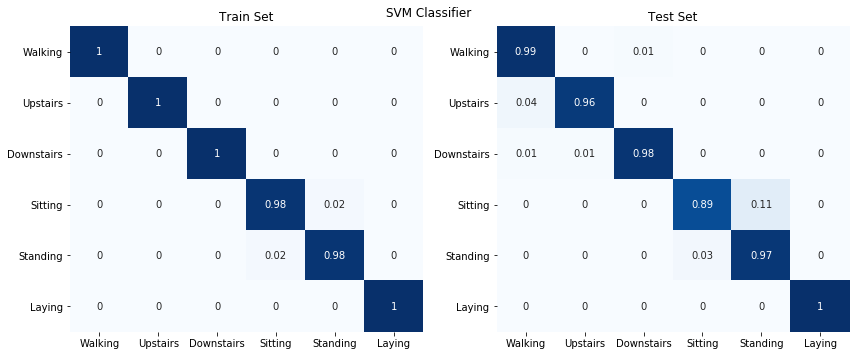

In [8]:
import seaborn as sns

labels = ['Walking', 'Upstairs', 'Downstairs', 'Sitting', 'Standing', 'Laying']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(np.round(cm_svm_train.astype('float') / cm_svm_train.sum(axis=1)[:, np.newaxis], 2), annot=True, cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
plt.title('Train Set')
plt.subplot(1, 2, 2)
sns.heatmap(np.round(cm_svm_test.astype('float') / cm_svm_test.sum(axis=1)[:, np.newaxis], 2), annot=True, cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
plt.title('Test Set')
plt.suptitle('SVM Classifier')
plt.tight_layout()


Looking at the confusion matrix of the train set we can see that it is almost a diagonal matrix - only the sitting and standing classes have some misclassified samples. As expected, the classifier also misclassified some test samples of the Sitting and Standing classes. Besides that, we can also conclude that it also misclassified some of the Walking, Walking Upstairs and Walking Downstairs classes, despite being perfect at classified these classes in the train set.

We can now also look at the confusion matrices of the Logistic Regression.

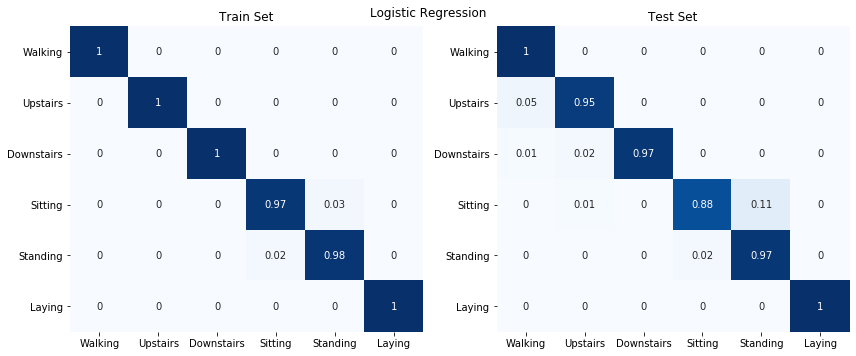

In [9]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(np.round(cm_lg_train.astype('float') / cm_lg_train.sum(axis=1)[:, np.newaxis], 2), annot=True, cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
plt.title('Train Set')
plt.subplot(1, 2, 2)
sns.heatmap(np.round(cm_lg_test.astype('float') / cm_lg_test.sum(axis=1)[:, np.newaxis], 2), annot=True, cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
plt.title('Test Set')
plt.suptitle('Logistic Regression')
plt.tight_layout()

Regarding the Logistic Regression model, the confusion matrix of the train set is very similar to the one for the Support Vector Machine. As for the test set, we can see that the Logistic Regression model also classified correctly 100% of the walking samples. However, some Walking Upstairs and Walking Downstairs samples are still misclassified as only Walking.

Both models achieved an excellent accuracy for this problem. Nonetheless, they can be improved to distinguish better the Standing and Laying classes.